In [ ]:
!pip install kagglehub

In [1]:
# Import the necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization, Input
from tensorflow.keras.layers import Activation, AveragePooling2D, Concatenate, Add, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks  import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import os
import warnings
warnings.filterwarnings('ignore')

2025-02-10 22:32:40.777594: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-10 22:32:40.788870: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739226760.803232    8852 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739226760.807117    8852 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-10 22:32:40.821095: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedhanyyy/chest-ctscan-images")

print("Path to dataset files:", path)

100%|██████████| 119M/119M [00:01<00:00, 84.4MB/s] 

Extracting files...


Path to dataset files: /teamspace/studios/this_studio/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1


In [2]:
import os

dataset_path = "/teamspace/studios/this_studio/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1" 

# Check downloaded dataset structure
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 50)


Directory: /teamspace/studios/this_studio/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1
Subdirectories: ['Data']
Files: []
--------------------------------------------------
Directory: /teamspace/studios/this_studio/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1/Data
Subdirectories: ['test', 'valid', 'train']
Files: []
--------------------------------------------------
Directory: /teamspace/studios/this_studio/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1/Data/test
Subdirectories: ['normal', 'adenocarcinoma', 'squamous.cell.carcinoma', 'large.cell.carcinoma']
Files: []
--------------------------------------------------
Directory: /teamspace/studios/this_studio/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1/Data/test/normal
Subdirectories: []
Files: ['7 - Copy (2).png', '6 (2).png', '11 (2).png', '7 - Copy - Copy.png', '7 (2) - Copy.png', '11 - Copy - Copy.png', '21.png', '8 - Copy.png', '1

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define dataset paths
dataset_path = "/teamspace/studios/this_studio/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1/Data"

# Load datasets
img_size = (224, 224)
batch_size = 32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path + "/train", 
    image_size=img_size, 
    batch_size=batch_size, 
    label_mode='categorical')

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path + "/valid", 
    image_size=img_size, 
    batch_size=batch_size, 
    label_mode='categorical')

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path + "/test", 
    image_size=img_size, 
    batch_size=batch_size, 
    label_mode='categorical')

Found 613 files belonging to 4 classes.
Found 72 files belonging to 4 classes.
Found 315 files belonging to 4 classes.


In [6]:
from tensorflow.keras import layers, models

In [7]:
# Normalize images
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [10]:
# number of classes
num_classes = 4

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train model
epochs = 10
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 492ms/step - accuracy: 0.2869 - loss: 2.1480 - val_accuracy: 0.4861 - val_loss: 1.1621
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 489ms/step - accuracy: 0.5175 - loss: 1.0901 - val_accuracy: 0.5972 - val_loss: 0.9359
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 492ms/step - accuracy: 0.6291 - loss: 0.8610 - val_accuracy: 0.6528 - val_loss: 0.8112
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 475ms/step - accuracy: 0.7070 - loss: 0.6601 - val_accuracy: 0.6944 - val_loss: 0.6973
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 481ms/step - accuracy: 0.7874 - loss: 0.5026 - val_accuracy: 0.7917 - val_loss: 0.5423
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 472ms/step - accuracy: 0.8525 - loss: 0.4108 - val_accuracy: 0.7917 - val_loss: 0.5565
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 468ms/step - accuracy: 0.8761 - loss: 0.2960 - val_accuracy: 0.7917 - val_loss: 0.5516
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 494ms/step - accuracy: 0.9390 - loss: 0.1639 - val_accu

In [13]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.2714 - loss: 4.1083
Test Accuracy: 0.2540


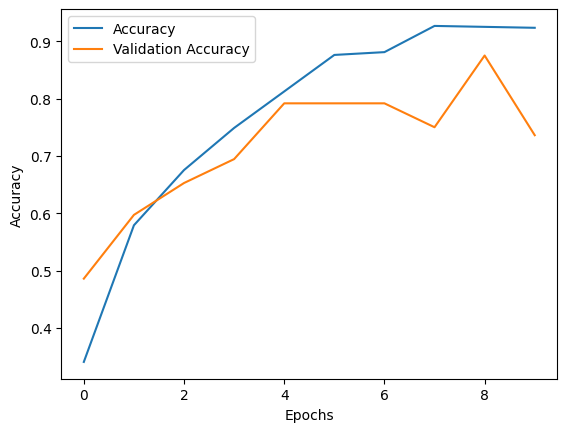

In [15]:
import matplotlib.pyplot as plt


# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()